## **Student Identity**
| Name | Student Number | Major |
|:---|:---|:---|
| Aditya Anandita Dharma Putra | 13219043 | Electrical Engineering |

This assignment can also be accessed via the following link:

https://github.com/adityanandita/Business-Analytics-Course/blob/main/exercise_lecture_4.ipynb

# **Exercise 4 | Bivariate Analysis**

---

In [64]:
# Import Library
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Read cp_data_eng_trial2.csv file as data
data = pd.read_csv('cp_data_eng_trial2.csv')

# **Exploratory Data Analysis**

In [65]:
# Show 10 data first
data.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,F,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,M,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,F,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,F,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,M,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,M,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,M,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,F,33.0,NaN,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,F,26.0,general payer1,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,M,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


In [66]:
# To make our data more informative, I'll try to mapping the Sex column like this:
sex_mapping = {'F': 'Female', 'M': 'Male'}
data['Sex'] = data['Sex'].map(sex_mapping)


In [67]:
# Then, we will see 10 data first again to make sure is it clear or not
data.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,Female,35.0,NaN,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,Male,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,Female,43.0,NaN,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,Female,45.0,NaN,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,Male,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,Female,33.0,NaN,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,Female,26.0,general payer1,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,Male,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


In [68]:
# Then, we will try to know the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   NO                  1293 non-null   int64  
 1   Customer_ID         1293 non-null   int64  
 2   Response            1003 non-null   object 
 3   Sex                 1232 non-null   object 
 4   Age                 1232 non-null   float64
 5   Job                 771 non-null    object 
 6   questionnaire1      1095 non-null   float64
 7   questionnaire2      1095 non-null   float64
 8   questionnaire3      1095 non-null   float64
 9   questionnaire4      1095 non-null   float64
 10  questionnaire5      1095 non-null   float64
 11  avg_charge          1033 non-null   float64
 12  charge_avg_per_mon  1033 non-null   float64
 13  charge_Monday       567 non-null    float64
 14  contraction_day     1086 non-null   float64
 15  contraction_day_JP  1086 non-null   object 
dtypes: flo

In [69]:
def analysis_null_vale_table(table):
    null_value = table.isnull().sum()
    percentage_null_value = round(100*null_value/len(table),2)
    return pd.concat([null_value,percentage_null_value], axis=1).rename(columns={0:"Missing Count", 1:"Percentage (%)"})

In [70]:
analysis_null_vale_table(data)

,Missing Count,Percentage (%)
NO,0,0.00
Customer_ID,0,0.00
Response,290,22.43
Sex,61,4.72
Age,61,4.72
Job,522,40.37
questionnaire1,198,15.31
questionnaire2,198,15.31
questionnaire3,198,15.31
questionnaire4,198,15.31


<Axes: >

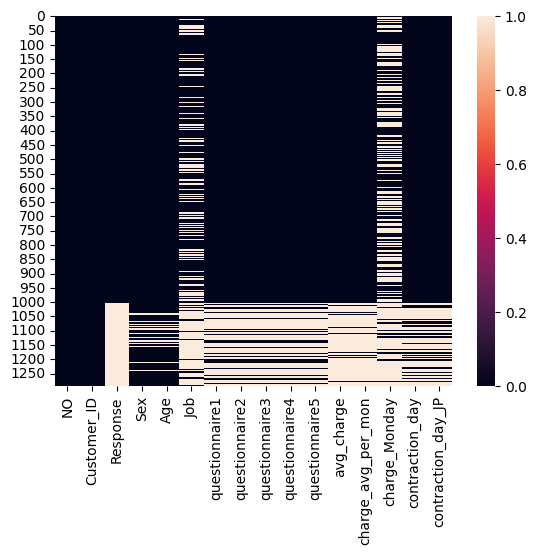

In [71]:
sns.heatmap(data.isna())

Based on the information and the heatmap above, we know that there are some data is not full and still have some gap for some columns. It will make our analysis will not accurate perfectly. So, to tackle this problem, we must do data cleaning and data cleansing first.

# **Data Cleaning**

In [72]:
data.columns

Index(['NO', 'Customer_ID', 'Response', 'Sex', 'Age', 'Job', 'questionnaire1',
       'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5',
       'avg_charge', 'charge_avg_per_mon', 'charge_Monday', 'contraction_day',
       'contraction_day_JP'],
      dtype='object')

In [73]:
# Assume the No and Cust. ID are must.
check_column = data.columns.difference(['NO', 'Customer_ID'])
empty_column = data[check_column].isnull().all(axis=1)
print(data[empty_column]['Customer_ID'])
print(f'\nTotal data incompleted: {len(data[empty_column])}')

1007    70100004
1011    70100008
1031    70100028
1040    70100037
1056    70100053
1062    70100059
1072    70100069
1078    70100075
1092    70100089
1094    70100091
1104    70100101
1111    70100108
1119    70100116
1125    70100122
1151    70100148
1153    70100150
1155    70100152
1181    70100178
1224    70100221
1230    70100227
1239    70100236
1262    70100259
1268    70100265
1280    70100277
1286    70100283
Name: Customer_ID, dtype: int64

Total data incompleted: 25


We know there are 25 accounts where the data is not completed. So We will delete this data from our dataframe.

In [79]:
data_clean = data[~empty_column]

In [80]:
# Then to tackle NaN value in job, we use this method:
data_clean['Job'] = data_clean['Job'].fillna('No Answer')

# To tackle there are no response, we use same method like Job
data_clean['Response'] = data_clean['Response'].fillna('No Answer')

C:\Users\user\AppData\Local\Temp\ipykernel_14808\4026267894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Job'] = data_clean['Job'].fillna('No Answer')
C:\Users\user\AppData\Local\Temp\ipykernel_14808\4026267894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Response'] = data_clean['Response'].fillna('No Answer')


<Axes: >

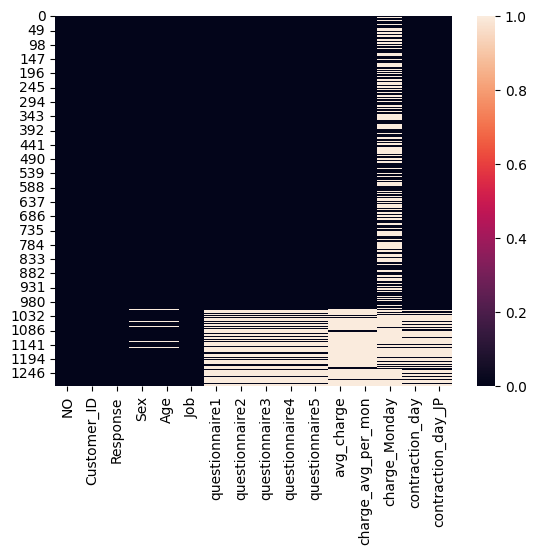

In [81]:
sns.heatmap(data_clean.isna())

In [82]:
# calculate number of nan or infs in a dataframe
def count_missing(data):
    missing = data.isnull().sum()
    missing = missing[missing > 0]
    missing.sort_values(inplace=True)
    return missing

print("Missing values in data_clean:")
count_missing(data_clean)

Missing values in data_clean:


Sex                    36
Age                    36
questionnaire1        173
questionnaire2        173
questionnaire3        173
questionnaire4        173
questionnaire5        173
contraction_day       182
contraction_day_JP    182
avg_charge            235
charge_avg_per_mon    235
charge_Monday         701
dtype: int64

Based on the data above, we know that there is empty data for each feature. In this case, we will focus on data cleaning for the features `charge_avg_per_mon` and `avg_charge`.

In [83]:
# Split the data into two parts where the first is the data that has no missing value on "charge_avg_per_mon" and "avg_charge", the second is the data that has missing value
data_clean_no_missing = data_clean.dropna(subset=['charge_avg_per_mon', 'avg_charge'])
data_clean_missing = data_clean[~data_clean.index.isin(data_clean_no_missing.index)]

Text(0.5, 1.0, 'Missing Value: 235')

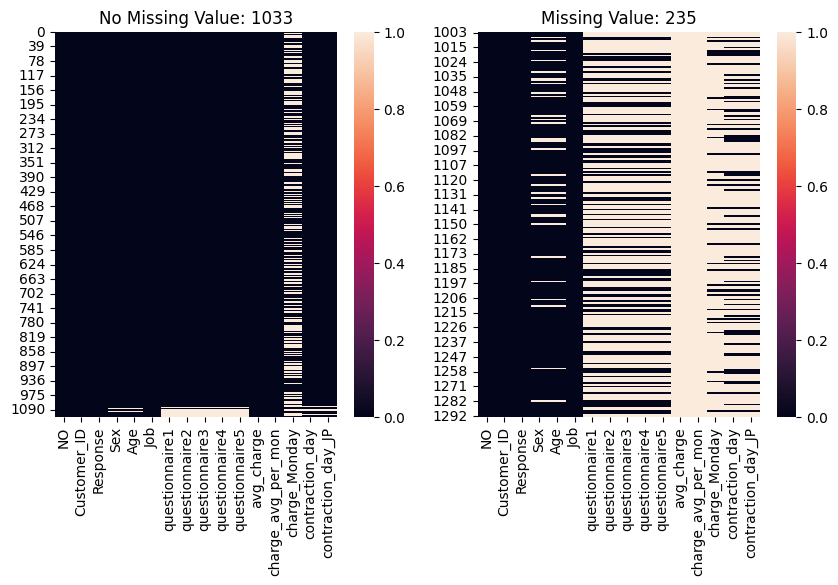

In [84]:
# Make the heatmap of the data that has no missing value on "charge_avg_per_mon" and "avg_charge" and the data that has missing value
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(data_clean_no_missing.isna(), ax=ax[0])
# add the count of data at the title of each heatmap
ax[0].set_title('No Missing Value: ' + str(len(data_clean_no_missing)))
sns.heatmap(data_clean_missing.isna(), ax=ax[1])
ax[1].set_title('Missing Value: ' + str(len(data_clean_missing)))

There are 1033 clean data where the data for the columns `charge_avg_per_mon` and `avg_charge` are completely filled, while the number of data with missing values for this feature is 235.

# **Work 1: Cross Table Creation and Scatter Plot for Analysis**

## **Task 1-1: Cross Table Creation for 'contraction_day' and 'contraction_day_JP' feature**

In [20]:
# Create a cross table for "contraction_day" and "Contraction_day_JP" and give a consideration to it.
cross_table = pd.crosstab(data_clean['contraction_day'], data_clean['contraction_day_JP'], margins=True, margins_name="Total")
print("Cross Table of Contraction_day and Contraction_day_JP:")
cross_table

Cross Table of Contraction_day and Contraction_day_JP:


contraction_day_JP,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Total
contraction_day,,,,,,,,
1.0,0,0,0,167,0,0,0,167
2.0,0,150,0,0,0,0,0,150
3.0,0,0,0,0,0,134,0,134
4.0,0,0,0,0,0,0,161,161
5.0,0,0,0,0,167,0,0,167
6.0,127,0,0,0,0,0,0,127
7.0,0,0,180,0,0,0,0,180
Total,127,150,180,167,167,134,161,1086


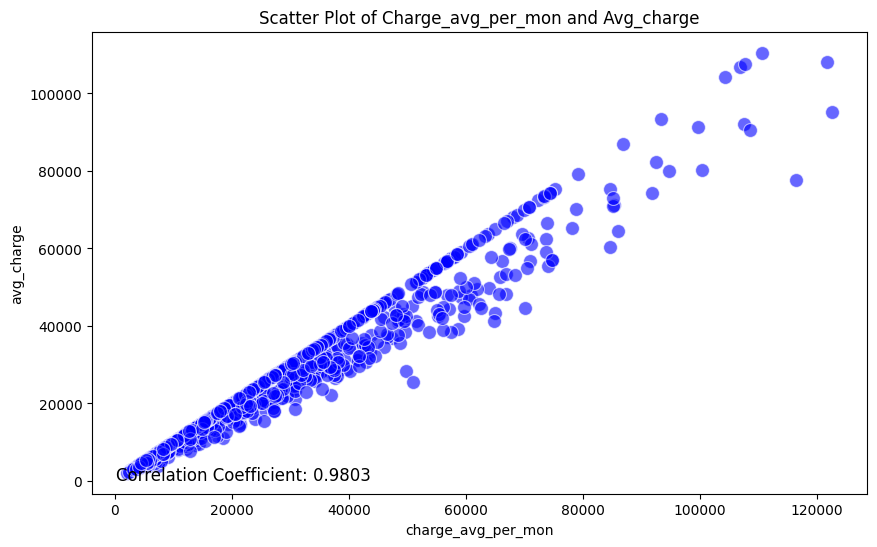

In [41]:
# Work 1-2: Create a scatter plot for "charge_avg_per_mon" and "avg_charge" and calculate correlation coefficient. Then give a consideration to them.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='charge_avg_per_mon', y='avg_charge', data=data_clean_no_missing, alpha=0.6, s=100, color='blue')
plt.title('Scatter Plot of Charge_avg_per_mon and Avg_charge')
# Calculate correlation coefficient
correlation_coefficient = pearsonr(data_clean_no_missing['charge_avg_per_mon'], data_clean_no_missing['avg_charge'])
# Add correlation coefficient to the plot and round it to 2 decimal places then place it at the top right of the plot
plt.text(100, 100, f'Correlation Coefficient: {round(correlation_coefficient[0], 4)}', fontsize=12, color='black')
plt.show()

## **Analysis for Work 1**

### **- Work 1-1:**
Based on the cross table provided, here’s a point-by-point analysis:

1. **Data Distribution**: The data shows that contractions are not evenly distributed across the days of the week. This could indicate patterns in customer behavior or operational factors affecting contraction days.
2. **Zero Counts**: The absence of contractions on certain days, such as Friday and Saturday, might suggest that these days are non-operational or have some other business-specific reasons for not having contractions.
3. **Peak Days**: Sunday shows a significantly higher number of contractions, which could imply a peak in customer activity or a scheduled event that causes a spike in contractions.
4. **Midweek Activity**: The lack of contractions on Tuesday and Wednesday could be indicative of a midweek drop in customer engagement or a potential issue with data collection on these days.
5. **Consistency**: Thursday’s contractions are only recorded on the 3rd and 7th contraction days, which may suggest a pattern or cycle in the business operations or customer behavior.
6. **Business Implications**: Understanding the reasons behind the distribution of contractions can help in resource allocation, marketing strategies, and operational planning.
7. **Further Investigation**: It would be beneficial to investigate why there are no contractions on certain days and why some days have significantly higher contractions to ensure that the data accurately reflects the business reality.
8. **Data Quality**: Ensure that the data collection process is robust and that the zero counts are not due to missing data or errors in data entry.

### **- Work 1-2:**
Based on the figure above, let's we try to analyze the scatter plot results for `charge_avg_per_mon` and `avg_charge` point by point:
1. **Positive Correlation**: The correlation coefficient of `0.98` indicates a `very strong positive relationship` between the two variables. This suggests that as the average charge per month increases, the average charge also tends to increase.
2. **Data Concentration**: The dense cluster of data points along the diagonal line in the scatter plot shows that there is a consistent linear relationship between `charge_avg_per_mon` and `avg_charge` for most of the data.
3. **Outliers**: The presence of outliers, particularly at higher values of `charge_avg_per_mon`, suggests that there may be instances where the average charge does not increase proportionally with the average charge per month. These outliers may need further investigation to understand their cause.
4. **Business Implications**: Given the strong positive correlation, this relationship can be used for predictive modeling. For example, if you know the average charge per month, you can predict the average charge with a high degree of confidence.
5. **Considerations for Future Analysis**: It may be beneficial to investigate the outliers to ensure they are not due to data entry errors or other factors that could skew the analysis. Additionally, understanding the reasons behind these outliers could provide insights into the business process.

---

# **Task 2: Analyze the relationship between Response feature with all questionaire feature**

This task will consider what we learned from the table and any data transformation required. Visualization can be produced from continuous data using `matplotlib.pyplot` function.

In [85]:
# recall the dataset from task 1 to here and name it df_task_2
df_task_2_no_missing = data_clean_no_missing
df_task_2_missing = data_clean_missing

In [86]:
# Show the 10 first of data
df_task_2_no_missing.head(10)

,NO,Customer_ID,Response,Sex,Age,Job,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5,avg_charge,charge_avg_per_mon,charge_Monday,contraction_day,contraction_day_JP
0,1,80000018,no reply,Female,35.0,No Answer,0.0,0.0,0.0,0.0,0.0,28656.0,28656.0,NaN,7.0,Saturday
1,2,80000042,reply,Male,39.0,general payer1,0.0,0.0,0.0,0.0,0.0,22815.0,29660.0,29320.0,3.0,Tuesday
2,3,80000234,no reply,Female,43.0,No Answer,0.0,0.0,0.0,0.0,0.0,11912.0,11912.0,13920.0,1.0,Sunday
3,4,80000273,no reply,Female,45.0,No Answer,0.0,0.0,0.0,0.0,0.0,3860.0,3860.0,NaN,4.0,Wednesday
4,5,80000529,no reply,Male,33.0,general payer1,0.0,0.0,0.0,0.0,0.0,9483.0,9483.0,NaN,1.0,Sunday
5,6,80000627,no reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,27896.0,34870.0,NaN,3.0,Tuesday
6,7,80000646,reply,Male,38.0,general payer1,0.0,0.0,0.0,0.0,0.0,28581.0,28581.0,NaN,2.0,Monday
7,8,80000806,no reply,Female,33.0,No Answer,0.0,0.0,0.0,0.0,0.0,17200.0,17200.0,22490.0,1.0,Sunday
8,9,80000966,no reply,Female,26.0,general payer1,0.0,0.0,0.0,0.0,0.0,28854.0,28854.0,NaN,5.0,Thursday
9,10,80000985,no reply,Male,50.0,doctor,0.0,0.0,0.0,0.0,0.0,63710.0,63710.0,NaN,2.0,Monday


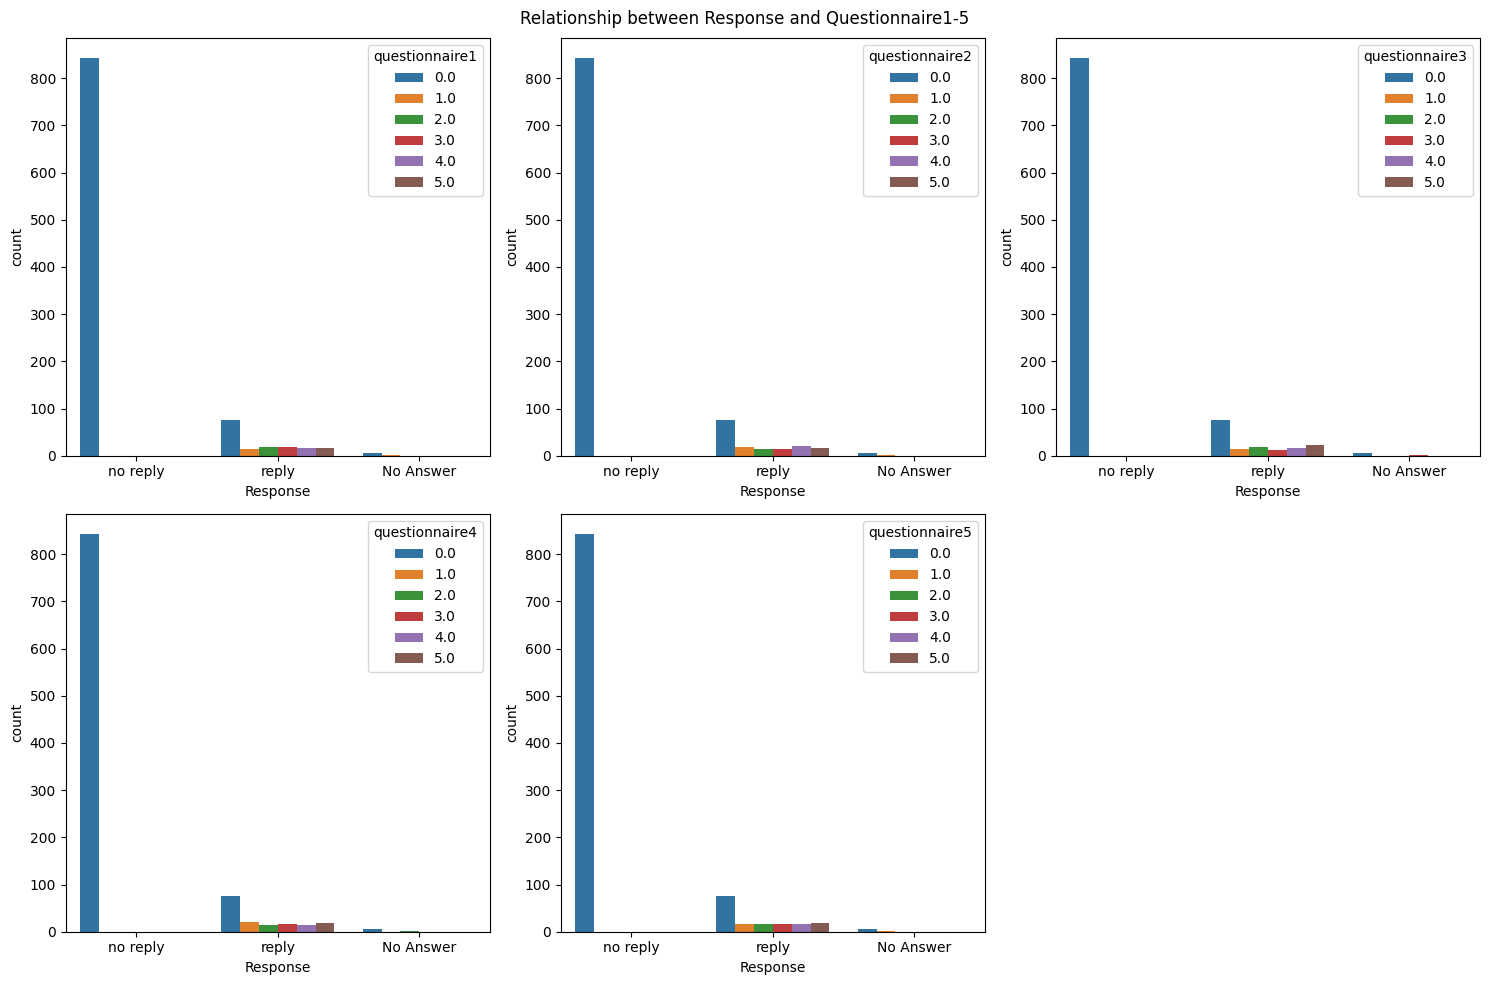

In [87]:
# please help me to make the Visualization of the relationship between "Response" and "questionnaire1-5"
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relationship between Response and Questionnaire1-5')
sns.countplot(x='Response', hue='questionnaire1', data=df_task_2_no_missing, ax=ax[0, 0])
sns.countplot(x='Response', hue='questionnaire2', data=df_task_2_no_missing, ax=ax[0, 1])
sns.countplot(x='Response', hue='questionnaire3', data=df_task_2_no_missing, ax=ax[0, 2])
sns.countplot(x='Response', hue='questionnaire4', data=df_task_2_no_missing, ax=ax[1, 0])
sns.countplot(x='Response', hue='questionnaire5', data=df_task_2_no_missing, ax=ax[1, 1])
ax[1, 2].axis('off')
plt.tight_layout()
plt.show()

Because there are too many values for point 0.0, we will exclude them for the next visualization to make it easier to understand the data.

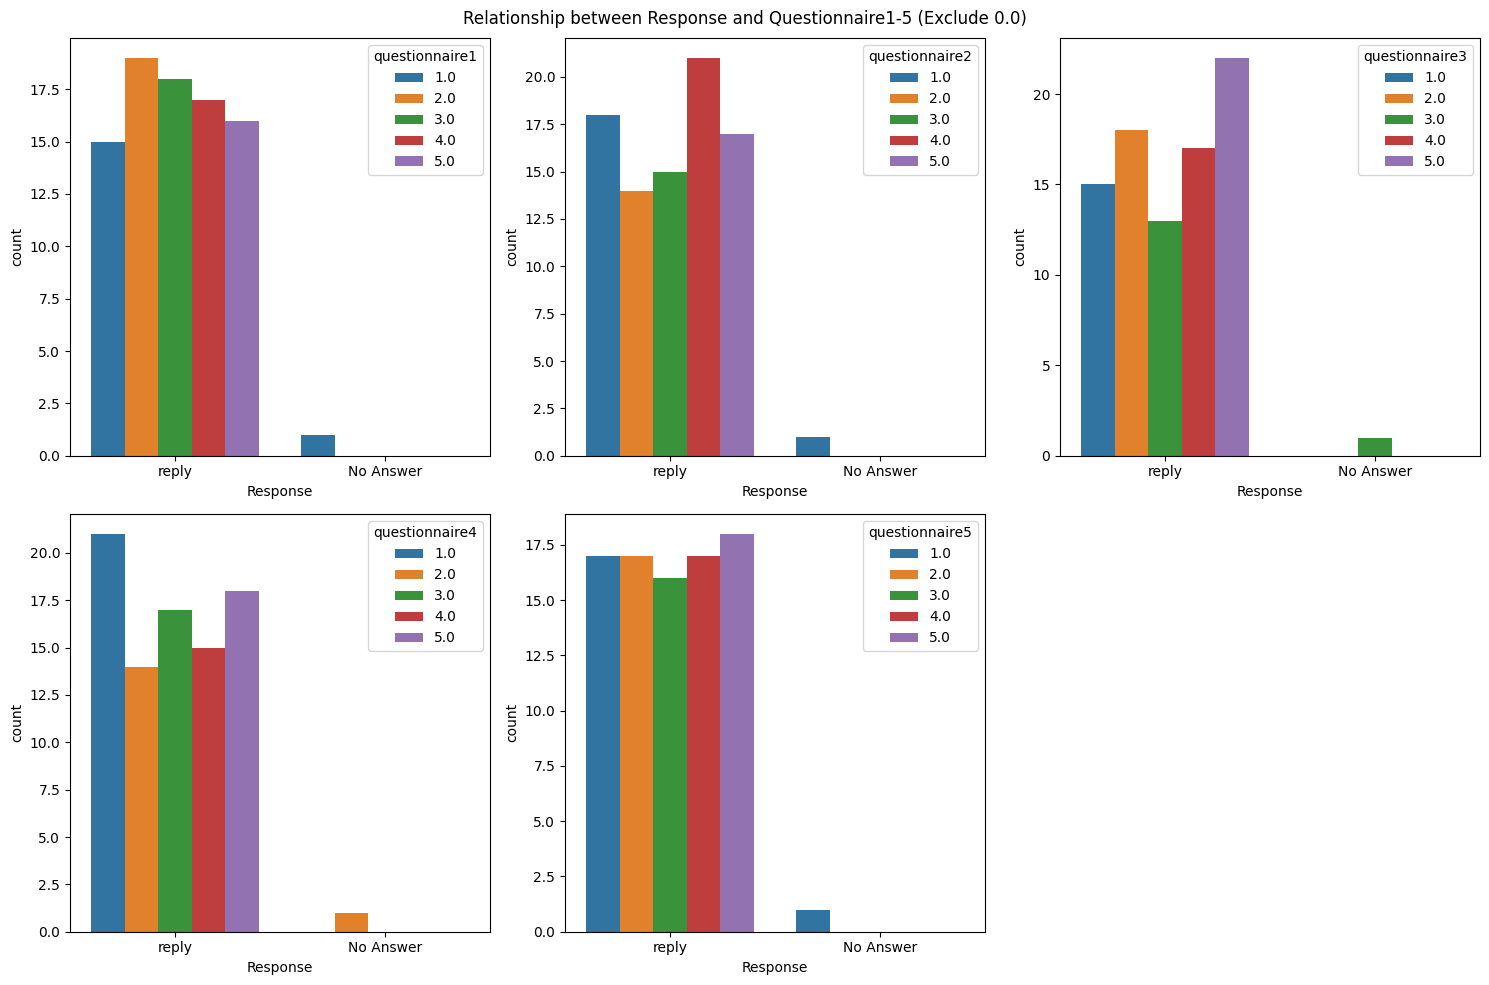

In [88]:
# Please make the visualization of the relationship between "Response" and "questionnaire1-5" but exclude the 0.0 value
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relationship between Response and Questionnaire1-5 (Exclude 0.0)')
sns.countplot(x='Response', hue='questionnaire1', data=df_task_2_no_missing[df_task_2_no_missing['questionnaire1'] != 0.0], ax=ax[0, 0])
sns.countplot(x='Response', hue='questionnaire2', data=df_task_2_no_missing[df_task_2_no_missing['questionnaire2'] != 0.0], ax=ax[0, 1])
sns.countplot(x='Response', hue='questionnaire3', data=df_task_2_no_missing[df_task_2_no_missing['questionnaire3'] != 0.0], ax=ax[0, 2])
sns.countplot(x='Response', hue='questionnaire4', data=df_task_2_no_missing[df_task_2_no_missing['questionnaire4'] != 0.0], ax=ax[1, 0])
sns.countplot(x='Response', hue='questionnaire5', data=df_task_2_no_missing[df_task_2_no_missing['questionnaire5'] != 0.0], ax=ax[1, 1])
ax[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [89]:
# create pivot table to aggregate the data by Response and questionnaire1-5
pivot_table = df_task_2_no_missing.pivot_table(index='Response', values=['questionnaire1', 'questionnaire2', 'questionnaire3', 'questionnaire4', 'questionnaire5'], aggfunc=np.mean)

# show the pivot table
pivot_table

,questionnaire1,questionnaire2,questionnaire3,questionnaire4,questionnaire5
Response,,,,,
No Answer,0.166667,0.166667,0.500,0.333333,0.166667
no reply,0.000000,0.000000,0.000,0.000000,0.000000
reply,1.593750,1.625000,1.675,1.562500,1.606250


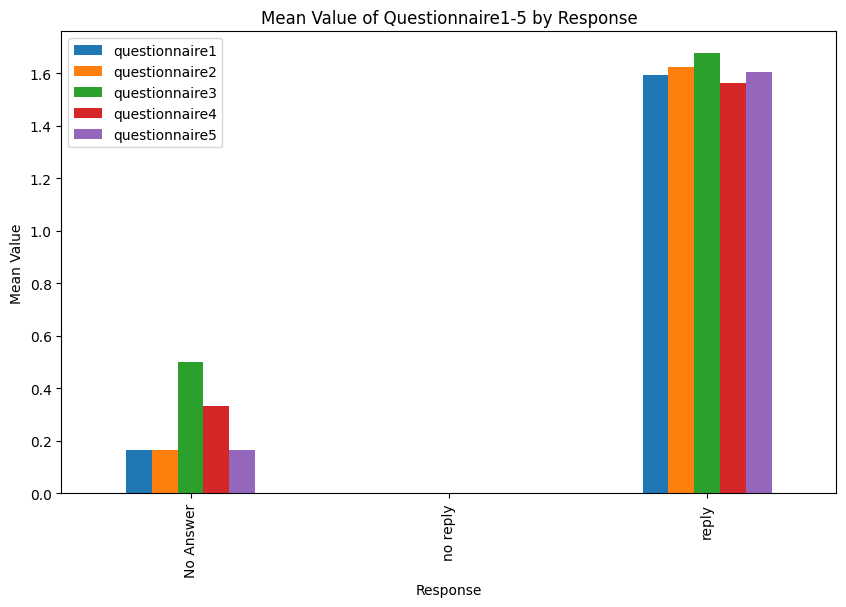

In [92]:
# Plot the stacked bar chart of the pivot table
pivot_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Mean Value of Questionnaire1-5 by Response')
plt.xlabel('Response')
plt.ylabel('Mean Value')
plt.show()


## **Analyze for Work 2**:
Based on the bar graphs provided, here’s a point-by-point analysis of the relationship between “Response” and “questionnaire1-5”:
1. **Implications for Business**: The overall engagement with the questionnaires is good, but the tendency towards neutral responses in some areas may suggest a need for further investigation or refinement of the questions to elicit more definitive opinions.
2. **Further Analysis**: It would be beneficial to conduct follow-up surveys or focus groups to delve deeper into the reasons behind the neutral responses and to understand the factors influencing the distribution of answers.

But, if we try to look at the latest bar chart, we try another method to find the insightful that data provide to us. And, we will found some points like these:
1. Engagement Insights:
    - The `Reply` category shows high mean values across all questionnaires, indicating that respondents who engaged with the campaign felt positively about the questionnaires.
    - The `No reply` category has lower mean values, which could reflect a general disengagement or dissatisfaction with the campaign or the questionnaires themselves.
2. Business Implications:
    - High mean values in the `Reply` category suggest that the questionnaires were well-received by those who engaged with the campaign.
    - The presence of ratings in the `No Answer` category for Questionnaire3 and Questionnaire4 warrants further investigation to understand why participants chose not to respond.
